<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/4%20Support%20Vector%20Machines/SVMwithOpenCVonIRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine with OpenCV on IRIS dataset

In [1]:
import numpy as np
import cv2
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## 1. Load IRIS dataset

The IRIS dataset is about the physical parameters of three different species of iris flower — setosa, versicolor, and virginica. It contains the following four physical parameters:
*   Sepal width
*   Sepal length
*   Petal width
*   Petal length


![picture](https://miro.medium.com/max/1094/1*7bnLKsChXq94QjtAiRn40w.png)
> *Credit: Kishan Maladkar [link here](https://https://analyticsindiamag.com/start-building-first-machine-learning-project-famous-dataset/)*



In [2]:
iris=datasets.load_iris()
print ("data structure:\n", dir(iris))              # data structure
print ("Data size:",iris.data.shape)                # size of the data
print ("Label size:", iris.target.shape)            # size of the label
print ("features", iris.feature_names)              # features
print ("unique labels", np.unique(iris.target))     # unique labels

data structure:
 ['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
Data size: (150, 4)
Label size: (150,)
features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
unique labels [0 1 2]


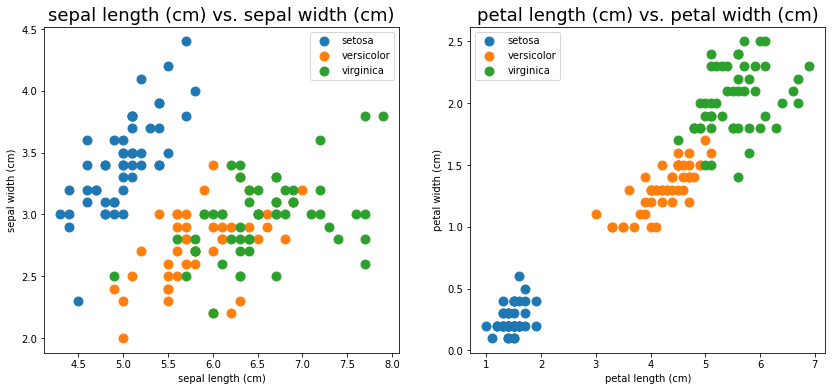

In [3]:
# Show IRIS data
def show_iris(feature1, feature2):
    n_samples = len(iris.target)
    for t in set(iris.target):
        x = [iris.data[i,feature1] for i in range(n_samples) if iris.target[i]==t]
        y = [iris.data[i,feature2] for i in range(n_samples) if iris.target[i]==t]
        plt.scatter(x, y, cmap='viridis',s=80, label=iris.target_names[t])
    plt.xlabel(iris.feature_names[feature1])
    plt.ylabel(iris.feature_names[feature2])
    plt.title(iris.feature_names[feature1] + " vs. " + iris.feature_names[feature2], fontsize=18)
    plt.legend(iris.target_names)

fig = plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
show_iris(0, 1)
plt.subplot(1, 2, 2)
show_iris(2, 3)
plt.show()


## 2. Pre-processing

In [4]:
data=iris.data.astype(np.float32)
target=iris.target.astype(np.uint)
# Split data into training and testing sets
X_train,X_test,y_train,y_test=model_selection.train_test_split(data,target,test_size=0.3,random_state=1)
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))

X_train: (105, 4)
y_train: (105,)
X_test:  (45, 4)
y_test:  (45,)


## 3. Build and Train the model

In [5]:
svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)


True

## 4. Prediction

In [6]:
predict = svm.predict(X_test)

## 5. Prediction

In [7]:
results = np.uint8(predict[1])
results = np.hstack(results)
print("results:", results.shape)
print("y_test:", y_test.shape)

results: (45,)
y_test: (45,)


## 6. Evaluation

In [8]:
print("Accuracy Score:", accuracy_score(y_test, results))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, results))
print("\nClassification Report:\n", classification_report(y_test, results))

Accuracy Score: 1.0

Confusion Matrix:
 [[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



References:

https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b